**Building a Neural Network Model using PyTorch:**

In [7]:
# Load data
import pandas as pd
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [11]:
# Create data loaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)


In [12]:
# Define the neural network architecture
class DiabetesClassifier(nn.Module):
    def __init__(self, input_size):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x


In [13]:
# Instantiate the model
input_size = X_train.shape[1]
model = DiabetesClassifier(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, labels.view(-1, 1)).item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss / len(test_loader):.4f}")

Epoch [1/20], Test Loss: 0.5967
Epoch [2/20], Test Loss: 0.5920
Epoch [3/20], Test Loss: 0.5923
Epoch [4/20], Test Loss: 0.5946
Epoch [5/20], Test Loss: 0.5993
Epoch [6/20], Test Loss: 0.5991
Epoch [7/20], Test Loss: 0.6006
Epoch [8/20], Test Loss: 0.6048
Epoch [9/20], Test Loss: 0.6023
Epoch [10/20], Test Loss: 0.6006
Epoch [11/20], Test Loss: 0.6069
Epoch [12/20], Test Loss: 0.6020
Epoch [13/20], Test Loss: 0.5985
Epoch [14/20], Test Loss: 0.6055
Epoch [15/20], Test Loss: 0.6076
Epoch [16/20], Test Loss: 0.6046
Epoch [17/20], Test Loss: 0.6053
Epoch [18/20], Test Loss: 0.6046
Epoch [19/20], Test Loss: 0.5933
Epoch [20/20], Test Loss: 0.6010


**Solving Overfitting using Dropout:**

In [26]:
class DiabetesClassifierWithDropout(nn.Module):
    def __init__(self, input_size):
        super(DiabetesClassifierWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model with dropout
model_with_dropout = DiabetesClassifierWithDropout(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train_losses_with_dropout = []
test_losses_with_dropout = []
for epoch in range(num_epochs):
    model_with_dropout.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_with_dropout(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses_with_dropout.append(train_loss)

    # Validation
    model_with_dropout.eval()
    with torch.no_grad():
        test_loss = 0.0
        for inputs, labels in test_loader:
            outputs = model_with_dropout(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            test_loss += loss.item() * inputs.size(0)

    test_loss /= len(test_loader.dataset)
    test_losses_with_dropout.append(test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss (with dropout): {test_loss:.4f}")



Epoch [1/20], Test Loss (with dropout): 0.6606
Epoch [2/20], Test Loss (with dropout): 0.6431
Epoch [3/20], Test Loss (with dropout): 0.6249
Epoch [4/20], Test Loss (with dropout): 0.6063
Epoch [5/20], Test Loss (with dropout): 0.5869
Epoch [6/20], Test Loss (with dropout): 0.5672
Epoch [7/20], Test Loss (with dropout): 0.5502
Epoch [8/20], Test Loss (with dropout): 0.5362
Epoch [9/20], Test Loss (with dropout): 0.5251
Epoch [10/20], Test Loss (with dropout): 0.5165
Epoch [11/20], Test Loss (with dropout): 0.5118
Epoch [12/20], Test Loss (with dropout): 0.5088
Epoch [13/20], Test Loss (with dropout): 0.5074
Epoch [14/20], Test Loss (with dropout): 0.5066
Epoch [15/20], Test Loss (with dropout): 0.5068
Epoch [16/20], Test Loss (with dropout): 0.5065
Epoch [17/20], Test Loss (with dropout): 0.5061
Epoch [18/20], Test Loss (with dropout): 0.5055
Epoch [19/20], Test Loss (with dropout): 0.5059
Epoch [20/20], Test Loss (with dropout): 0.5060


**Trying Different Optimizer:**

In [ ]:
# Define different optimizers
optimizers = {
    'SGD': optim.SGD(model.parameters(), lr=0.01),
    'Adam': optim.Adam(model.parameters(), lr=0.001),
    'RMSprop': optim.RMSprop(model.parameters(), lr=0.001),
}


In [ ]:
# Train the model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    print(f"Training with {optimizer_name} optimizer:")
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            test_loss = 0.0
            for inputs, labels in test_loader:
                outputs = model(inputs)
                test_loss += criterion(outputs, labels.view(-1, 1)).item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss / len(test_loader):.4f}")
    print()


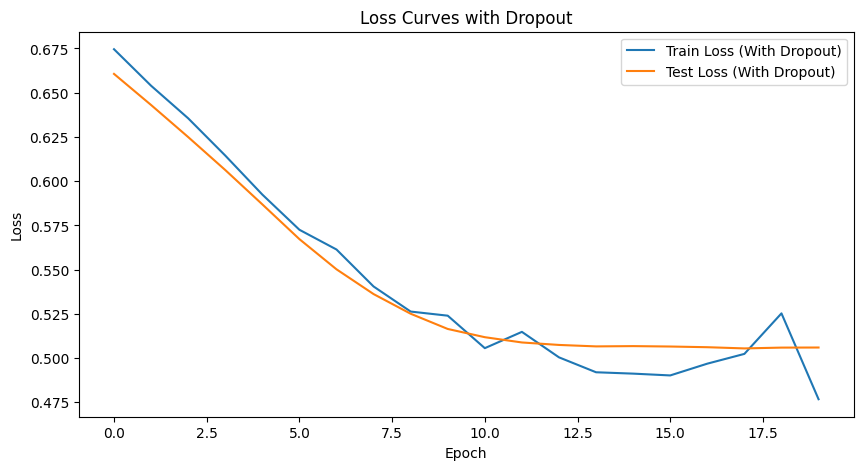

In [27]:
import matplotlib.pyplot as plt

# Plot the loss curves for the model with dropout
plt.figure(figsize=(10, 5))
plt.plot(train_losses_with_dropout, label='Train Loss (With Dropout)')
plt.plot(test_losses_with_dropout, label='Test Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves with Dropout')
plt.legend()
plt.show()